<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/K-Means-Clustering/blob/main/Copy_of_Clustering_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset

In [3]:
dataset=pd.read_csv('CC_GENERAL.csv')
dataset=dataset.drop(columns=['CUST_ID'])
X=dataset.iloc[:,:].values

In [4]:
print(dataset.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

# Checking for missing Values

In [5]:
column_X=dataset.columns
column_index=[]

for cols in column_X:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    column_index.append({'column ':cols,
                         'index':dataset.columns.get_loc(cols)})

col_ind_len=len(column_index)

for i in column_index:
  print(i)


{'column ': 'CREDIT_LIMIT', 'index': 12}
{'column ': 'MINIMUM_PAYMENTS', 'index': 14}


# Handling missing data

In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,[12]]=imputer.fit_transform(X[:,[12]])
X[:,[14]]=imputer.fit_transform(X[:,[14]])

# Applying Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [8]:
print(X)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


# Applying the Elbow method with K Means++ to see the ideal number of clusters

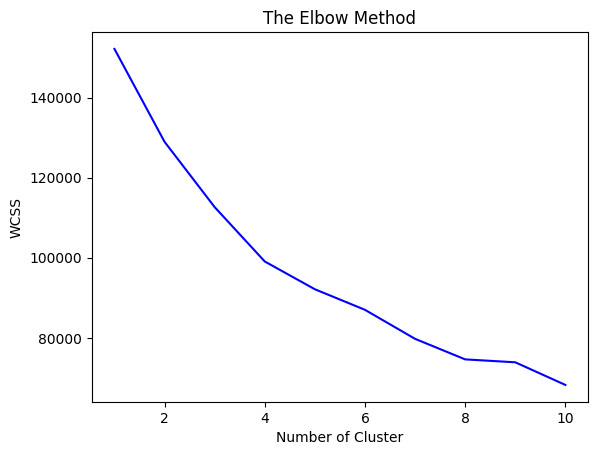

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

# Training & prediction with 5 clusters

In [10]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [12]:
dataset_1=dataset
dataset_1['Cluster1']=y_kmeans
print(dataset.groupby('Cluster1').mean())

              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster1                                                                  
0          951.308662           0.963860  1343.868682        666.287869   
1          112.139925           0.383880   336.786040        198.905029   
2         1524.526864           0.965856   256.307471        206.339148   
3         3768.044039           0.986886  8296.454943       5523.177902   
4         4899.191184           0.967070   561.735460        353.900374   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster1                                                              
0                     677.776272    227.284528             0.899158   
1                     138.098287    324.787501             0.283491   
2                      50.316838    793.733402             0.160194   
3                    2775.001178    654.125174             0.945167   
4                     207.937887   4995.907745  

# Visualising our result

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset_1,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters (5 Clusters)")
plt.legend(title='Clusters')
plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
kmeans_2=KMeans(n_clusters=4,init='k-means++')
y_kmeans_2=kmeans_2.fit_predict(X)

In [ ]:
dataset_2=dataset
dataset_2['Cluster2']=y_kmeans_2